# The purpose of this project is to 

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [35]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 1, 1)

In [4]:
# Bank of America
BAC = data.DataReader("BAC", 'iex', start, end)

# CitiGroup
C = data.DataReader("C", 'iex', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'iex', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'iex', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'iex', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'iex', start, end)

5y
5y
5y
5y
5y
5y


In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [7]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [9]:
bank_stocks.head()

Bank Ticker      BAC                                              C           \
Stock Info      open     high      low    close     volume     open     high   
date                                                                           
2014-03-04   15.3056  15.5470  15.2591  15.5378  101701851  45.6939  46.2895   
2014-03-05   15.6028  16.0860  15.5935  16.0303  207621573  46.3652  47.1972   
2014-03-06   16.1883  16.3842  16.0860  16.1232  138302215  47.1782  47.4524   
2014-03-07   16.2998  16.3462  16.0262  16.1046  109771403  47.4713  47.6604   
2014-03-10   16.0489  16.2347  16.0303  16.2347   81974096  46.4786  46.9041   

Bank Ticker                                ...          MS                    \
Stock Info       low    close    volume    ...        open     high      low   
date                                       ...                                 
2014-03-04   45.5142  46.1666  23956058    ...     27.8934  28.2835  27.8117   
2014-03-05   46.2894  46.7244  23628360    ...     28.2291  29.0730  28.0113   
2014-03-06   46.9702  46.9986  26975414    ...     29.0820  29.2817  28.8733   
2014-03-07   46.6772  46.9135  25784426    ...     29.6719  29.6809  29.1002   
2014-03-10   46.4030  46.8662  15398387    ...     29.2363  29.3089  28.8189   

Bank Ticker                         WFC                                       
Stock Info     close    volume     open     high      low    close    volume  
date                                                                          
2014-03-04   28.2200  11178954  40.4215  40.4907  40.1706  40.4388  14951272  
2014-03-05   29.0095  14828813  40.5080  40.8627  40.3929  40.7416  13660688  
2014-03-06   28.8915  12623645  40.9146  41.0963  40.8108  40.9579  14726410  
2014-03-07   29.2272  14547381  41.3213  41.9442  41.1828  41.4857  20512670  
2014-03-10   29.1546  10757263  41.4424  41.7668  41.1655  41.6587  11860395  

[5 rows x 30 columns]

In [11]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     32.2037
C       77.7974
GS     269.3347
JPM    116.8560
MS      57.4768
WFC     63.4830
dtype: float64

In [12]:
returns = pd.DataFrame()

In [13]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['close'].pct_change()
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
date                                                                          
2014-03-04         NaN       NaN        NaN         NaN        NaN         NaN
2014-03-05    0.031697  0.012082   0.018788    0.015718   0.027977    0.007488
2014-03-06    0.005795  0.005868   0.004072    0.012722  -0.004068    0.005309
2014-03-07   -0.001154 -0.001811   0.009618    0.008490   0.011619    0.012886
2014-03-10    0.008078 -0.001008  -0.004304   -0.003368  -0.002484    0.004170

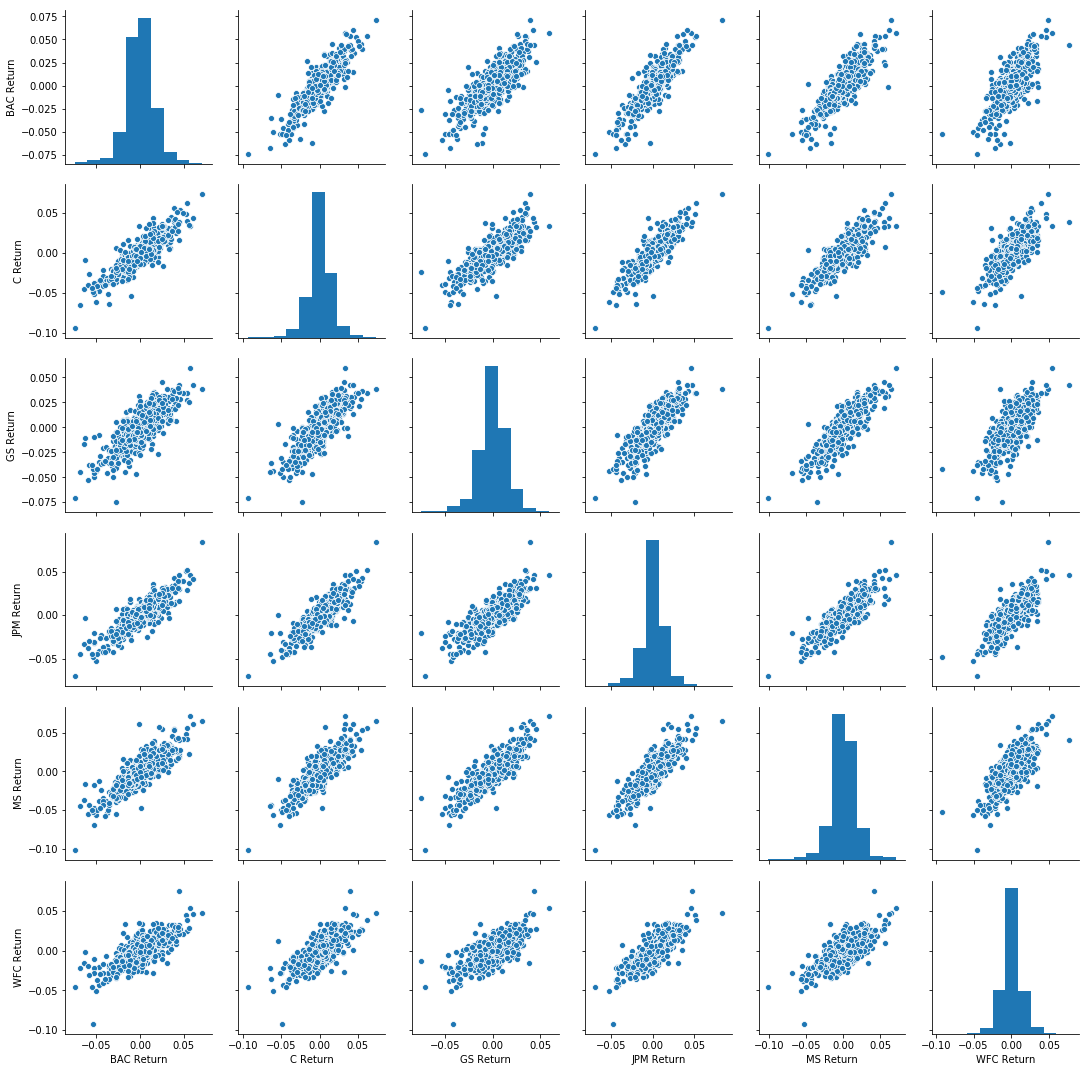

In [14]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

In [15]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return    2016-06-24
C Return      2016-06-24
GS Return     2018-11-12
JPM Return    2016-06-24
MS Return     2016-06-24
WFC Return    2018-02-05
dtype: object

In [16]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return    2016-02-12
C Return      2016-02-12
GS Return     2016-11-09
JPM Return    2016-02-12
MS Return     2016-11-09
WFC Return    2016-11-10
dtype: object

In [17]:
returns.std() # Citigroup riskiest

BAC Return    0.016106
C Return      0.015149
GS Return     0.014380
JPM Return    0.013168
MS Return     0.016377
WFC Return    0.012825
dtype: float64

In [18]:
returns.ix['2017-01-01':'2017-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


BAC Return    0.013713
C Return      0.011077
GS Return     0.012405
JPM Return    0.010229
MS Return     0.013134
WFC Return    0.011194
dtype: float64

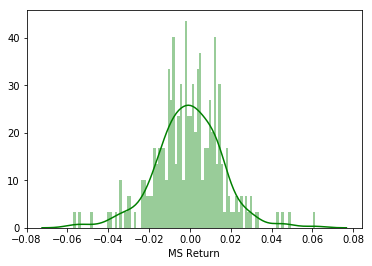

In [19]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

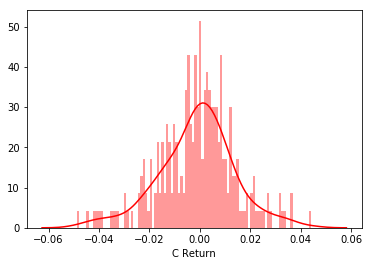

In [20]:
sns.distplot(returns.ix['2018-01-01':'2018-12-31']['C Return'],color='red',bins=100)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

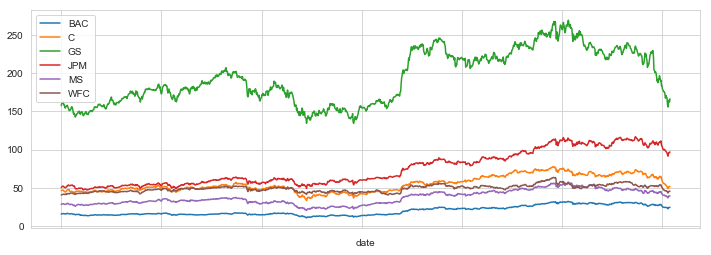

In [22]:
for tick in tickers:
    bank_stocks[tick]['close'].plot(figsize=(12,4),label=tick)
plt.legend()

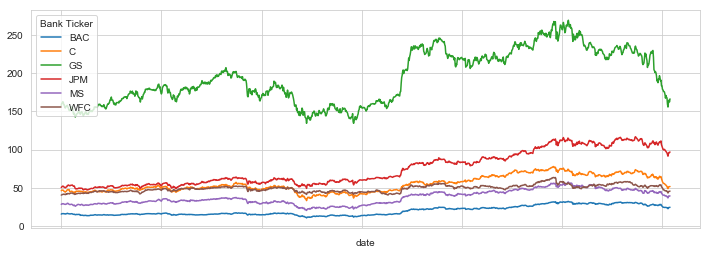

In [24]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').plot(figsize = (12,4))

In [25]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').iplot()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



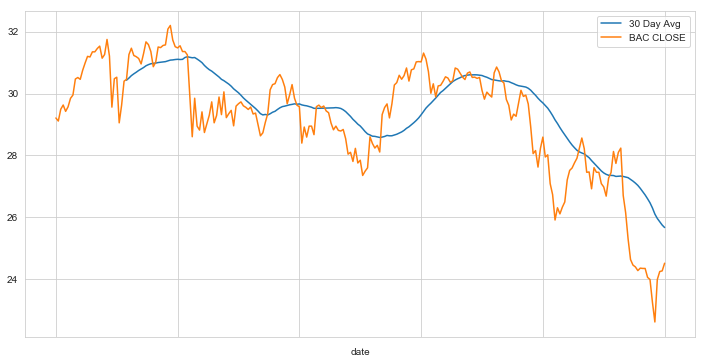

In [26]:
plt.figure(figsize=(12,6))
BAC['close'].ix['2018-01-01':'2019-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['close'].ix['2018-01-01':'2019-01-01'].plot(label='BAC CLOSE')
plt.legend()

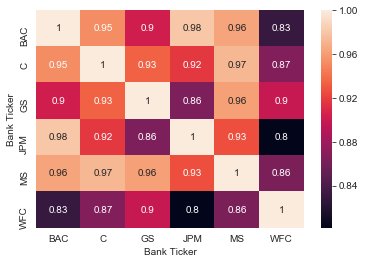

In [27]:
sns.heatmap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

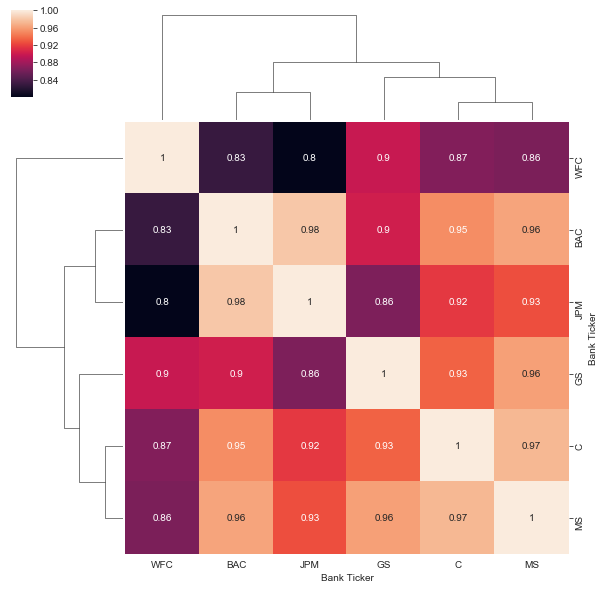

In [28]:
sns.clustermap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

In [29]:
close_corr = bank_stocks.xs(key='close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [34]:
BAC[['open', 'high', 'low', 'close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [33]:
MS['close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [32]:
BAC['close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll')